In [2]:
%matplotlib inline

import os
import sys
import math
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from functools import partial

module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)
    
from preprocessing import select

plt.rcParams.update({'figure.max_open_warning': 0})

### Primeiro precisamos definir os tamanhos de cada campo

In [3]:
widths = [
    # Identificação de controle.
    2, 8, 7, 4, 9, 1,

    # Módulo C - Características gerais dos moradores.
    2, 2, 2, 1, 2, 2, 4, 3, 1, 1, 1, 1,

    # Módulo D - Características de educação das pessoas de 5 anos ou mais de
    # idade.
    1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

    # Módulo E - Trabalho dos moradores do domicílio.
    1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 1, 5, 1, 8, 1, 8, 1, 3, 1, 8, 1, 8,
    1, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,

    # Módulo F - Rendimentos domiciliares.
    1, 8, 1, 8, 1, 8, 1, 8, 

    # Módulo G - Pessoas com deficiências.
    1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
    1, 1, 1, 1,

    # Módulo I - Cobertura de plano de saúde.
    1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,

    # Módulo J - Utilização de serviços de saúde.
    1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
    1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

    # Módulo K - Saúdes dos indivíduos com 60 anos ou mais e cobertura de
    # mamografia entre mulheres de 50 anos ou mais.
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,

    # Módulo L - Crianças com menos de 2 anos.
    2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 4, 2, 2, 4,
    2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

    # Módulo M - Informações para futuros contatos,  características do trabalho
    # e apoio social.
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
    1,

    # Módulo N - Percepção do estado de saúde.
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

    # Módulo O - Acidentes e violências.
    1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,

    # Módulo P - Estilos de vida.
    1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
    1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
    1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 9, 1, 2, 2, 2, 2,
    2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

    # Módulo Q - Doenças crônicas.
    1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
    2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
    1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
    1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
    1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,

    # Módulo R - Saúde da mulher (mulheres de 18 anos ou mais de idade).
    1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
    1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
    1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,

    # Módulo S - Atendimento pré-natal.
    1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
    1, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,

    # Módulo U - Saúde bucal.
    1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,

    # Módulo X - Atendimento médico.
    1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

    # Módulo W - Informações laboratoriais.
    5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5,

    # Variáveis de amostragem.
    14, 14, 14, 14, 9, 17, 3, 5,

    # Variáveis derivadas de morador.
    1, 1, 1, 8
]

### Também precisamos definir os nomes referentes a cada campo

In [4]:
names = [
    # Identificação de controle.
    'V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'UPA', 'V0025',

    # Módulo C - Características gerais dos moradores.
    'C001', 'C00301', 'C004', 'C006', 'C00701', 'C00702', 'C00703', 'C008',
    'C009', 'C010', 'C011', 'C012',

    # Módulo D - Características de educação das pessoas de 5 anos ou mais de
    # idade.
    'D001', 'D002', 'D003', 'D004', 'D005', 'D006', 'D007', 'D008', 'D009',
    'D010', 'D011', 'D012', 'D013', 'D014', 'D015',

    # Módulo E - Trabalho dos moradores do domicílio.
    'E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E01001',
    'E01002', 'E01003', 'E011', 'E01201', 'E014', 'E01501', 'E01601', 'E01602',
    'E01603', 'E01604', 'E01605', 'E017', 'E01801', 'E01802', 'E01803',
    'E01804', 'E01805', 'E019', 'E020', 'E021', 'E022', 'E023', 'E024', 'E025',
    'E02501', 'E02502', 'E026', 'E027',

    # Módulo F - Rendimentos domiciliares.
    'F001', 'F00102', 'F007', 'F00702', 'F008', 'F00802', 'VDF001',
    'VDF00102',

    # Módulo G - Pessoas com deficiências.
    'G001', 'G002', 'G00201', 'G003', 'G004', 'G005', 'G006', 'G007', 'G00701',
    'G008', 'G009', 'G010', 'G014', 'G015', 'G01501', 'G016', 'G017', 'G018',
    'G021', 'G022', 'G02201', 'G023', 'G024', 'G02501', 'G02502', 'G02503',
    'G026', 'G027', 'G032',

    # Módulo I - Cobertura de plano de saúde.
    'I001', 'I002', 'I003', 'I004', 'I005', 'I006', 'I007', 'I00701', 'I008',
    'I009', 'I010', 'I011',

    # Módulo J - Utilização de serviços de saúde.
    'J001', 'J002', 'J003', 'J004', 'J005', 'J006', 'J007', 'J008', 'J009',
    'J010', 'J011', 'J012', 'J013', 'J014', 'J015', 'J016', 'J017', 'J018',
    'J019', 'J020', 'J021', 'J022', 'J023', 'J024', 'J025', 'J026', 'J027',
    'J029', 'J030', 'J031', 'J032', 'J033', 'J034', 'J035', 'J036', 'J037',
    'J038', 'J039', 'J04001', 'J04002', 'J041', 'J042', 'J043', 'J044', 'J045',
    'J046', 'J047', 'J048', 'J049', 'J050', 'J051', 'J052', 'J053', 'J054',
    'J055', 'J056', 'J057', 'J058', 'J059', 'J060',

    # Módulo K - Saúdes dos indivíduos com 60 anos ou mais e cobertura de
    # mamografia entre mulheres de 50 anos ou mais.
    'K001', 'K002', 'K003', 'K004', 'K005', 'K006', 'K007', 'K008', 'K009',
    'K010', 'K011', 'K012', 'K013', 'K014', 'K015', 'K016', 'K017', 'K018',
    'K019', 'K020', 'K021', 'K022', 'K023', 'K024', 'K025', 'K026', 'K027',
    'K028', 'K029', 'K030', 'K031', 'K032', 'K033', 'K034', 'K035', 'K036',
    'K039', 'K040', 'K041', 'K042', 'K043', 'K044', 'K045', 'K046', 'K047',
    'K048', 'K049', 'K050', 'K051', 'K052', 'K053', 'K054', 'K055', 'K056',
    'K057', 'K058', 'K059', 'K06001', 'K06002', 'K06003', 'K06101', 'K06102',
    'K062',

    # Módulo L - Crianças com menos de 2 anos.
    'L00201', 'L00202', 'L00203', 'L003', 'L004', 'L005', 'L006', 'L007',
    'L008', 'L009', 'L010', 'L011', 'L012', 'L013', 'L014', 'L015', 'L01613',
    'L01614', 'L01615', 'L01616', 'L01617', 'L01618', 'L01619', 'L01620',
    'L01621', 'L01622', 'L01623', 'L01624', 'L01701', 'L01702', 'L01703',
    'L01704', 'L01705', 'L01706', 'L01707', 'L01708', 'L01709', 'L01710',
    'L01711', 'L01712', 'L01713', 'L01714', 'L01715', 'L01716', 'L018', 'L019',
    'L020',

    # Módulo M - Informações para futuros contatos,  características do trabalho
    # e apoio social.
    'M001', 'M002', 'M003', 'M005', 'M006', 'M007', 'M008', 'M009', 'M010',
    'M01101', 'M01102', 'M01103', 'M01104', 'M01105', 'M01106', 'M01107',
    'M01108', 'M01301', 'M01302', 'M01303', 'M014', 'M015', 'M016', 'M017',
    'M018', 'M019',

    # Módulo N - Percepção do estado de saúde.
    'N001', 'N002', 'N003', 'N004', 'N005', 'N006', 'N007', 'N008', 'N010',
    'N011', 'N012', 'N013', 'N014', 'N015', 'N016', 'N017', 'N018', 'N019',
    'N020', 'N021', 'N022', 'N023',

    # Módulo O - Acidentes e violências.
    'O001', 'O002', 'O003', 'O004', 'O005', 'O006', 'O007', 'O008', 'O009',
    'O00901', 'O010', 'O011', 'O012', 'O013', 'O014', 'O015', 'O016', 'O017',
    'O01801', 'O01802', 'O019', 'O020', 'O021', 'O02101', 'O022', 'O023',
    'O024', 'O025', 'O027', 'O028', 'O029', 'O030', 'O031', 'O032', 'O033',
    'O034', 'O035', 'O036', 'O037', 'O038', 'O039', 'O040', 'O041', 'O042',
    'O043', 'O044', 'O045', 'O046', 'O047', 'O048',

    # Módulo P - Estilos de vida.
    'P001', 'P00101', 'P002', 'P003', 'P00301', 'P004', 'P00401',
    'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012',
    'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019', 'P020',
    'P021', 'P022', 'P023', 'P024', 'P025', 'P026', 'P02601', 'P027',
    'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034', 'P035',
    'P036', 'P03701', 'P03702', 'P038', 'P039', 'P03901', 'P03902',
    'P03903', 'P040', 'P04101', 'P04102', 'P042', 'P04301', 'P04302',
    'P044', 'P04401', 'P04403', 'P04404', 'P045', 'P046', 'P047',
    'P048', 'P049', 'P050', 'P051', 'P052', 'P053', 'P05401', 'P05402',
    'P05403', 'P05404', 'P05405', 'P05406', 'P05407', 'P05408',
    'P05409', 'P05410', 'P05411', 'P05412', 'P05413', 'P05414',
    'P05415', 'P05416', 'P05417', 'P05418', 'P05419', 'P05421',
    'P05422', 'P055', 'P056', 'P05601', 'P05602', 'P05603', 'P05604',
    'P05605', 'P057', 'P058', 'P05801', 'P05802', 'P05901', 'P05902',
    'P05903', 'P05904', 'P060', 'P061', 'P062', 'P063', 'P064', 'P065',
    'P066', 'P067', 'P068', 'P069', 'P07001', 'P07002', 'P07003',
    'P071', 'P072',

    # Módulo Q - Doenças crônicas.
    'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
    'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q01801',
    'Q01802', 'Q01803', 'Q01804', 'Q01805', 'Q01806', 'Q01807', 'Q01808',
    'Q01901', 'Q01902', 'Q01903', 'Q01904', 'Q01905', 'Q020', 'Q021', 'Q022',
    'Q023', 'Q024', 'Q026', 'Q027', 'Q028', 'Q029', 'Q030', 'Q031', 'Q032',
    'Q033', 'Q03401', 'Q03402', 'Q035', 'Q036', 'Q037', 'Q038', 'Q039', 'Q040',
    'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q04601', 'Q04602', 'Q04603',
    'Q04604', 'Q04605', 'Q04606', 'Q04607', 'Q04608', 'Q04609', 'Q04701',
    'Q04702', 'Q04703', 'Q04704', 'Q04705', 'Q048', 'Q049', 'Q050', 'Q051',
    'Q052', 'Q053', 'Q054', 'Q05501', 'Q05502', 'Q05503', 'Q05504', 'Q05505',
    'Q05506', 'Q05507', 'Q05508', 'Q05509', 'Q056', 'Q057', 'Q058', 'Q059',
    'Q060', 'Q061', 'Q06201', 'Q06202', 'Q06203', 'Q06204', 'Q06205', 'Q06206',
    'Q063', 'Q06301', 'Q06302', 'Q06303', 'Q06304', 'Q064', 'Q06501', 'Q06502',
    'Q06503', 'Q06504', 'Q066', 'Q067', 'Q068', 'Q069', 'Q070', 'Q071',
    'Q07201', 'Q07202', 'Q07203', 'Q07204', 'Q07205', 'Q07206', 'Q073', 'Q074',
    'Q075', 'Q076', 'Q07701', 'Q07702', 'Q078', 'Q079', 'Q080', 'Q08101',
    'Q08102', 'Q08103', 'Q08104', 'Q08105', 'Q082', 'Q083', 'Q084', 'Q085',
    'Q08601', 'Q08603', 'Q08604', 'Q08605', 'Q087', 'Q088', 'Q089', 'Q09001',
    'Q09003', 'Q09004', 'Q09005', 'Q091', 'Q092', 'Q093', 'Q094', 'Q095',
    'Q09601', 'Q09602', 'Q09603', 'Q097', 'Q098', 'Q100', 'Q101', 'Q102',
    'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q108', 'Q109', 'Q110', 'Q11001',
    'Q11002', 'Q11003', 'Q11004', 'Q111', 'Q112', 'Q113', 'Q11401', 'Q11402',
    'Q11403', 'Q115', 'Q116', 'Q11601', 'Q11602', 'Q11603', 'Q117', 'Q11801',
    'Q11802', 'Q11803', 'Q11804', 'Q119', 'Q120', 'Q121', 'Q122', 'Q123',
    'Q124', 'Q125', 'Q12601', 'Q12602', 'Q12603', 'Q12604', 'Q12605', 'Q127',
    'Q128', 'Q130', 'Q131', 'Q132', 'Q133', 'Q134', 'Q135', 'Q136', 'Q137',

    # Módulo R - Saúde da mulher (mulheres de 18 anos ou mais de idade).
    'R001', 'R002', 'R003', 'R004', 'R005', 'R006', 'R007', 'R008', 'R009',
    'R010', 'R011', 'R012', 'R013', 'R014', 'R015', 'R016', 'R017', 'R018',
    'R019', 'R020', 'R021', 'R022', 'R023', 'R024', 'R025', 'R026', 'R027',
    'R028', 'R029', 'R030', 'R031', 'R032', 'R033', 'R034', 'R035', 'R03601',
    'R03602', 'R03603', 'R03604', 'R03605', 'R03606', 'R03607', 'R03608',
    'R03609', 'R03610', 'R03611', 'R037', 'R038', 'R039', 'R040', 'R041',
    'R04101', 'R042', 'R04201', 'R043', 'R044', 'R045', 'R046', 'R047', 'R048',
    'R04901', 'R04902', 'R04903',

    # Módulo S - Atendimento pré-natal.
    'S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009',
    'S01001', 'S01002', 'S01003', 'S01004', 'S01005', 'S01101', 'S01102',
    'S01103', 'S012', 'S013', 'S01401', 'S01402', 'S01403', 'S01404', 'S01405',
    'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023',
    'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030', 'S031', 'S032',
    'S033', 'S034', 'S035', 'S036', 'S037', 'S038', 'S039', 'S040', 'S041',
    'S042', 'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050',
    'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058',

    # Módulo U - Saúde bucal.
    'U001', 'U00201', 'U00202', 'U00203', 'U004', 'U005', 'U006', 'U009',
    'U010', 'U011', 'U014', 'U015', 'U01701', 'U01702', 'U01801', 'U01802',
    'U019', 'U020', 'U021', 'U022', 'U023', 'U02301', 'U024', 'U02401',
    'U025',

    # Módulo X - Atendimento médico.
    'X001', 'X002', 'X003', 'X004', 'X005', 'X006', 'X007', 'X008', 'X011',
    'X012', 'X01401', 'X01402', 'X01501', 'X01502', 'X016', 'X017', 'X018',
    'X019', 'X02001', 'X02002', 'X02003', 'X02004', 'X02005', 'X02006',
    'X02201', 'X02202', 'X02203', 'X02204', 'X02205', 'X02206', 'X024',
    'X02501', 'X02502', 'X02503', 'X02504', 'X02505', 'X02506', 'X02507',
    'X02508', 'X02509', 'X02510',

    # Módulo W - Informações laboratoriais.
    'W00101', 'W00102', 'W00103', 'W00201', 'W00202', 'W00203', 'W00301',
    'W00302', 'W00303', 'W00401', 'W00402', 'W00403', 'W00404', 'W00405',
    'W00406', 'W00407', 'W00408',

    # Variáveis de amostragem.
    'V0028', 'V0029', 'V00281', 'V00291', 'V00282', 'V00292', 'V00283',
    'V00293',

    # Variáveis derivadas de morador.
    'VDD004', 'VDE001', 'VDE002', 'VDDATAM'
]

## Preparando a base de dados.

### Selecionando os atributos identificados como relevantes.

- Primeiro vamos definir as colunas a serem utilizadas;
- Depois, vamos utilizar
pequenos chunks para processar a base;
- Por fim, vamos salvar o arquivo
processado;
- No caso de já existir um arquivo CSV, ele será carregado.

In [5]:
var_path = '{}/data/processed/variaveis.csv'.format(module_path)

try:
    df_full = pd.read_csv(var_path)
except FileNotFoundError:
    cols = {
        'V0001': 'Regiao',
        
        ### Depressão ###
        'Q092': 'Diagnosticado_Depressao',
        
        ### Doença cerebral ###

        'G001': 'Defic_Intelectual',
        'G002': 'Nasceu_Ou_Adquiriu_Defic_Intelectual',
        'G004': 'Defic_Intelectual_Limita_Atividades',
        'J007': 'Doença_Fisica_Cronica_Mental',
        'Q112': 'Visita_Medico',
        'Q115': 'Doença_Cerebral_Limita',
        'Q110': 'Esqz_Bipol_Psicose_TOC',
        'Q11401': 'Psicoterapia_Doenca_Mental',
        'Q11402': 'Medicamentos_Doenca_Mental',

        ### Doenças sistêmicas ###

        'Q063': 'Diagnostico_Doenca_Coracao',
        'Q06301': 'Diagnostico_Infarto',
        'Q06302': 'Diagnostico_Angina',
        'Q06303': 'Diagnostico_Insuf_Cardiaca',
        'Q116':  'Diagnostico_Doença_Pulmao',
        'Q11601': 'Diagnostico_Enf_Pulmonar',
        'Q11602': 'Diagnotico_Bronquite_Cronica',
        'Q11603': 'Diagnostico_Outra_Pulmonar',
        'Q120':  'Diagnostico_Cancer',
        'Q124':  'Diagnostico_Insuf_Renal_Cronica',

        ### Estresse Físico ###

        'N004': 'Duas_Semanas_Cansado', 
        'N010': 'Duas_Semanas _Problema_Sono',
        'N011': 'Cansado_Subir_Andar_Dor_Peito',
        'P039': 'Exercicio_Pesado',

        ## Estresse mental ###

        'N015': 'Lentidao_Agitacao_Ultimas_Semanas',
        'Q132': 'Uso_Remedio_Dormir',
        'Q133': 'Uso_Quantos_Dias_Remedio_Dormir',

        ### Gravidez ###

        'R034': 'Evitar_Gravidez',
        'R035': 'Porque_Nao_Evitar_Gravidez',
        'R040': 'Idade_Gravidez',
        'R039': 'Ja_Engravidou',
        'R041': 'Aborto_Espontaneo',
        'R042': 'Aborto_Provocado',

        ### Lesão Cerebral ###

        'Q068': 'Diagnosticado_AVC_Derrame',
        'O025': 'Sofreu_Violencia_Pessoa_Desconhecida',
        'O027': 'Tipo_Mais_Grave_Violencia',
        'O029': 'Local_Violencia',
        'O031': 'Deixou_Fazer_Atividade_Violencia',
        'O033': 'Assistencia_Saude_Violencia',
        'O036': 'Sequela_Incapacidade_Violencia',
        'O037': 'Sofreu_Violencia_Pessoa_Conhecida',
        'O038': 'Frequencia_Violencia_Pessoa_Conhecida',
        'O039': 'Tipo_Violencia_Pessoa_Conhecida',
        'O042': 'Pessoa_Conhecida_Violencia',

        ### Medicamentos ###

        'Q06204': 'Recomend_Remedio_Colesterol',
        'Q006': 'Toma_Remedio_Hipertensao',
        'Q07205': 'Toma_Remedio_AVC',
        'Q06503': 'Toma_Remedio_Doenca_Coracao',

        ### Menopausa/Andropausa ###

        'R026': 'Ainda_Menstrua',
        'R027': 'Parou_Menstruar',
        'R028': 'Entrou_Menopausa',
        'R029': 'Fez_Tratamento_Menopausa',

        ### Oscilação Hormonal ###

        'R03601': 'Pilula_Evitar_Gravidez',
        'R03602': 'Tabela_Evitar_Gravidez',
        'C006': 'Sexo',
        'Q030': 'Tem_Diabetes',
        'N014': 'Falta_Apetite',

        ### Puberdade ###

        'D002': 'Frequenta_Escola',
        'D003': 'Curso_Frequentado',
        'O041': 'Violencia_Na_Escola_Casa',
        'C008': 'Idade',

        ### Traumas de infância ###

        'G007': 'Nasceu_Ou_Adquiriu_Defi_Fisica',
        'L004': 'Local_Acomp_Crescimento_Crianca',
        'D006': 'Serie_Ano_Que_Frequenta',
        
        ### Atividade Física ###
        'P034': 'Ativ_Fisica_3meses',
        'P035': 'Ativ_Fisica_Semana',
        'P036': 'Ativ_Fisica_Qual'
    }

    path ='{}/data/raw/pessoas.txt'.format(module_path)

    # Preparando para processar o arquivo original.
    chunksize = 500
    pool = mp.Pool(mp.cpu_count())
    reader = pd.read_fwf(
        path, 
        widths=widths, 
        names=names,
        chunksize=chunksize
    )
    
    # Processamento do arquivo original.
    partial_select = partial(select, cols=cols)
    df_full = pd.concat(pool.map(partial_select, reader))
    df_full = df_full.replace('^\.$', '', regex=True)
    
    # Salvando arquivo processado.
    df_full.to_csv(var_path, header=True, index=False)

In [6]:
df_full.shape

(205546, 68)

## Depressão x Região

In [7]:
a = df_full.query('Diagnosticado_Depressao == 1')['Regiao'].value_counts()
b = df_full.query('Diagnosticado_Depressao == 1 | Diagnosticado_Depressao == 2')['Regiao'].value_counts()
c = ((a / b) * 100)
cols = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantis',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia',
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo',
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

select(c.to_frame().transpose(), cols).transpose()

,Regiao
Rondônia,4.604486
Acre,5.292172
Amazonas,2.629544
Roraima,4.839723
Pará,2.694611
Amapá,3.828829
Tocantis,7.260726
Maranhão,3.551297
Piauí,4.656319
Ceará,5.078125


### Selecionando instâncias diagnosticadas com depressão

- Primeiro, será feita uma query buscando as instâncias onde o campo Diagnosticado_Depressao é igual 1;
- Depois, o resultado será salvo em um novo arquivo csv;
- Caso o arquivo já exista, basta ser carregado.

In [8]:
dep_path = '{}/data/processed/depressao.csv'.format(module_path)
try:
    df_dep = pd.read_csv(dep_path)
except FileNotFoundError:
    df_dep = df_full.query('Diagnosticado_Depressao == 1')
    df_dep.to_csv(dep_path, header=True, index=False)

In [9]:
df_dep.shape

(4235, 68)

### Selecionando instâncias não diagnosticadas com depressão

- Primeiro, será feita uma query buscando as instâncias onde o campo Diagnosticado_Depressao é igual 2;
- Depois, o resultado será salvo em um novo arquivo csv;
- Caso o arquivo já exista, basta ser carregado.

In [10]:
dep_path = '{}/data/processed/nao-depressao.csv'.format(module_path)
try:
    df_ndep = pd.read_csv(dep_path)
except FileNotFoundError:
    df_ndep = df_full.query('Diagnosticado_Depressao == 2').sample(df_dep.shape[0])
    df_ndep.to_csv(dep_path, header=True, index=False)

In [11]:
df_ndep.shape

(4235, 68)

### Unindo as bases

O objetivo é trabalhar com instâncias diagnosticadas ou não com depressão. Para tanto, iremos concatenar as duas bases geradas.

In [12]:
sample_path = '{}/data/processed/sample.csv'.format(module_path)

try:
    df_sample = pd.read_csv(sample_path)
except FileNotFoundError:
    df_sample = pd.concat([df_dep, df_ndep])
    df_sample.to_csv(sample_path, header=True, index=False)

In [13]:
df_sample.shape

(8470, 68)

In [14]:
n = df_sample.shape[0]
missing_vals = n - df_sample.count()
missing_vals

Regiao                                      0
Diagnosticado_Depressao                     0
Defic_Intelectual                           0
Nasceu_Ou_Adquiriu_Defic_Intelectual     8403
Defic_Intelectual_Limita_Atividades      8403
Doença_Fisica_Cronica_Mental                0
Visita_Medico                            8144
Doença_Cerebral_Limita                   8144
Esqz_Bipol_Psicose_TOC                      0
Psicoterapia_Doenca_Mental               8144
Medicamentos_Doenca_Mental               8144
Diagnostico_Doenca_Coracao                  0
Diagnostico_Infarto                      7915
Diagnostico_Angina                       7915
Diagnostico_Insuf_Cardiaca               7915
Diagnostico_Doença_Pulmao                   0
Diagnostico_Enf_Pulmonar                 8220
Diagnotico_Bronquite_Cronica             8220
Diagnostico_Outra_Pulmonar               8220
Diagnostico_Cancer                          0
Diagnostico_Insuf_Renal_Cronica             0
Duas_Semanas_Cansado              

In [15]:
useful = (missing_vals * 100 / n)
useful[useful < 80]

Regiao                                   0.000000
Diagnosticado_Depressao                  0.000000
Defic_Intelectual                        0.000000
Doença_Fisica_Cronica_Mental             0.000000
Esqz_Bipol_Psicose_TOC                   0.000000
Diagnostico_Doenca_Coracao               0.000000
Diagnostico_Doença_Pulmao                0.000000
Diagnostico_Cancer                       0.000000
Diagnostico_Insuf_Renal_Cronica          0.000000
Duas_Semanas_Cansado                     1.216057
Duas_Semanas _Problema_Sono              0.000000
Cansado_Subir_Andar_Dor_Peito            0.000000
Exercicio_Pesado                        44.214876
Lentidao_Agitacao_Ultimas_Semanas        0.000000
Uso_Remedio_Dormir                       0.000000
Uso_Quantos_Dias_Remedio_Dormir         78.276269
Evitar_Gravidez                         68.311688
Idade_Gravidez                          68.559622
Ja_Engravidou                           60.070838
Aborto_Espontaneo                       68.559622


In [16]:
df_sample[['Idade', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez', 'Parou_Menstruar']].describe()

,Idade,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez,Parou_Menstruar
count,8470.000000,1840.000000,2663.000000,1887.000000
mean,45.501417,10.462500,20.798723,46.439322
std,15.956346,4.832789,5.226432,9.897695
min,18.000000,1.000000,0.000000,0.000000
25%,33.000000,7.000000,17.000000,45.000000
50%,44.000000,14.000000,20.000000,49.000000
75%,57.000000,14.000000,23.000000,52.000000
max,96.000000,14.000000,42.000000,65.000000


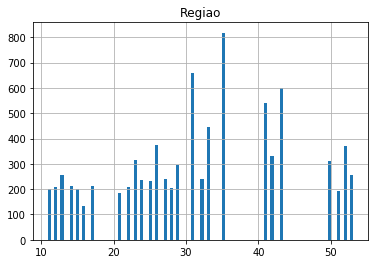

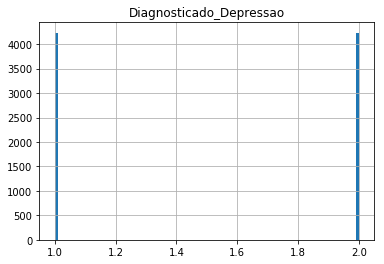

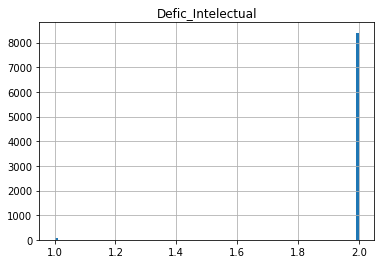

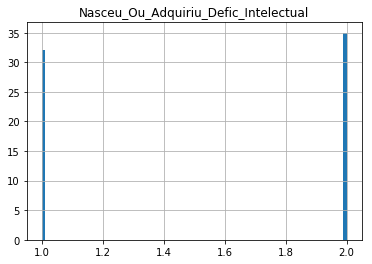

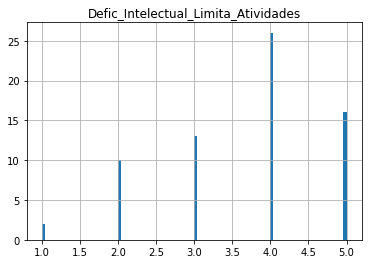

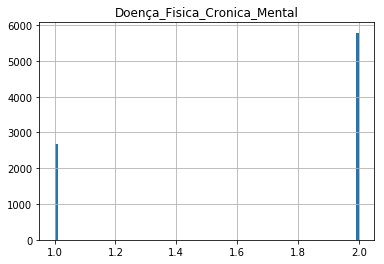

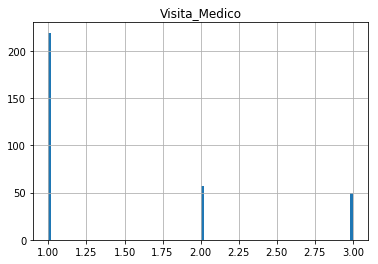

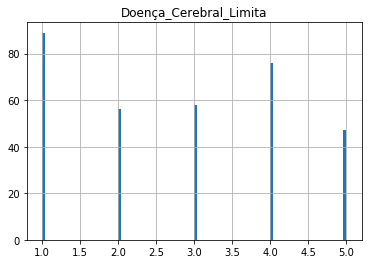

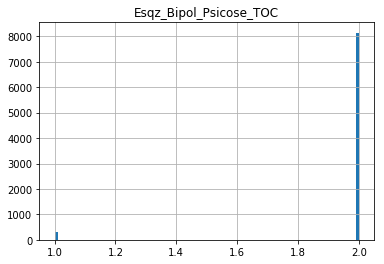

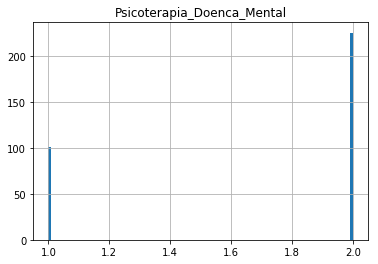

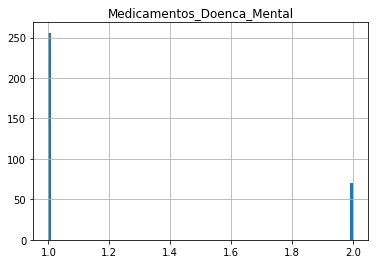

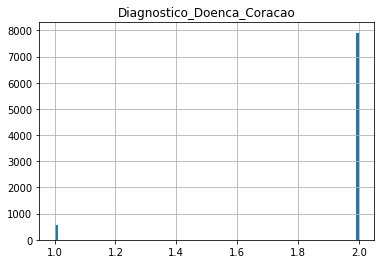

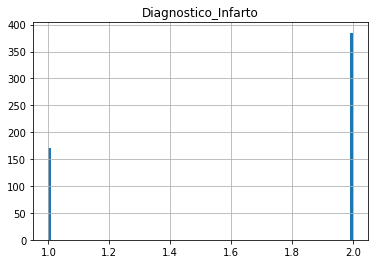

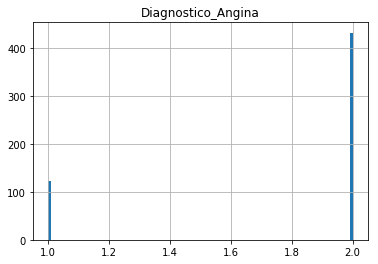

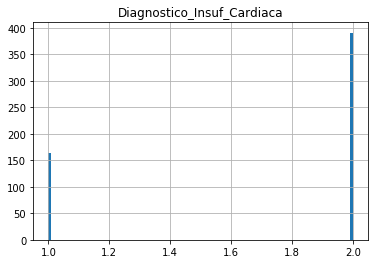

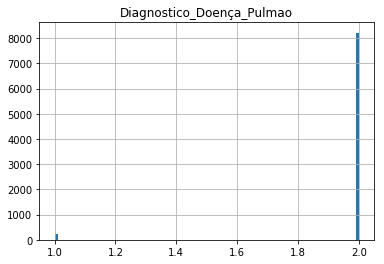

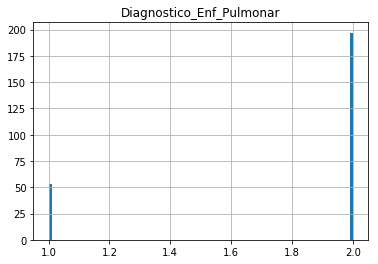

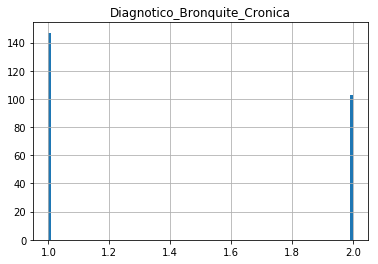

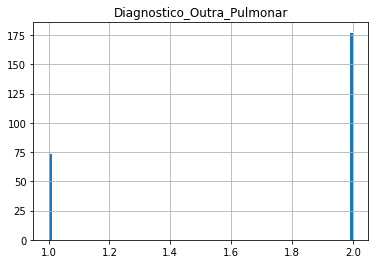

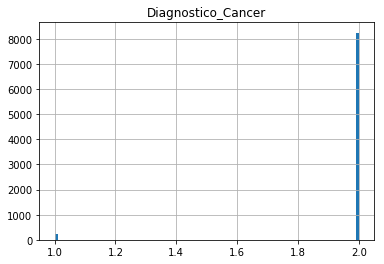

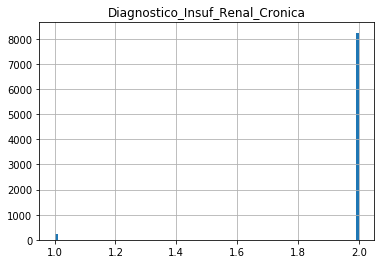

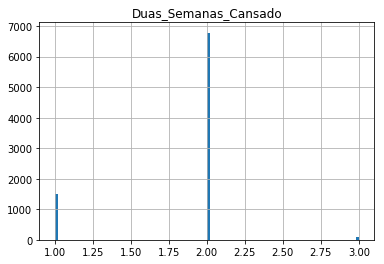

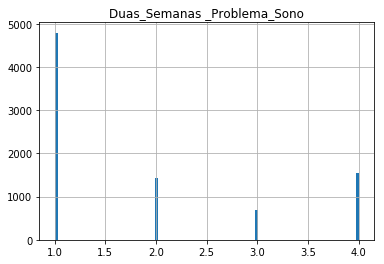

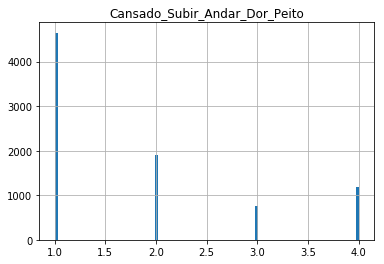

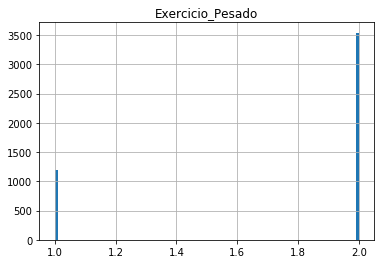

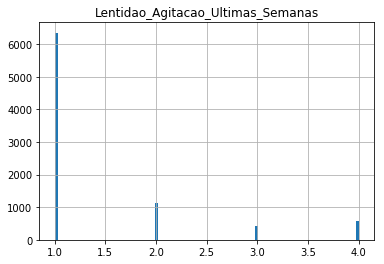

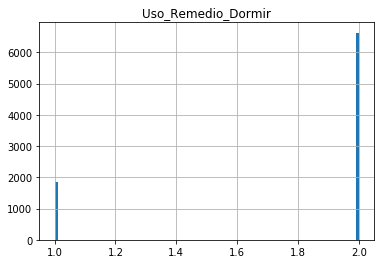

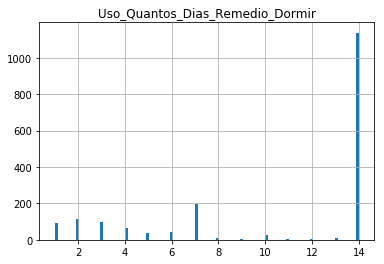

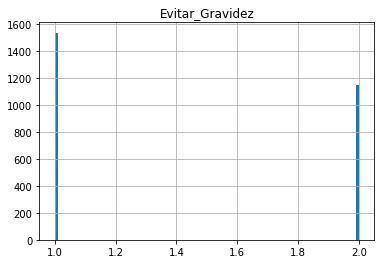

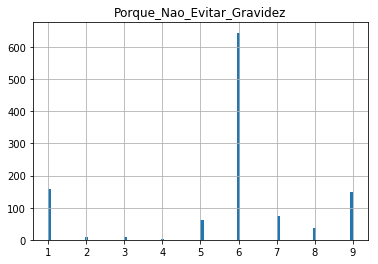

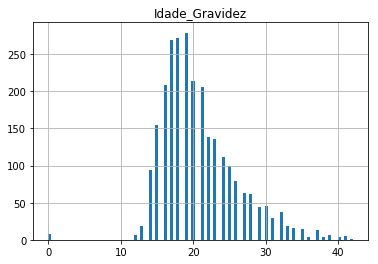

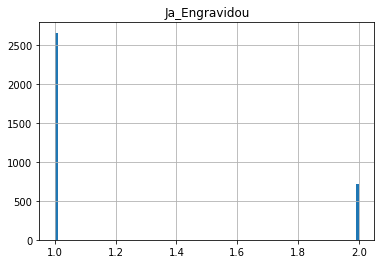

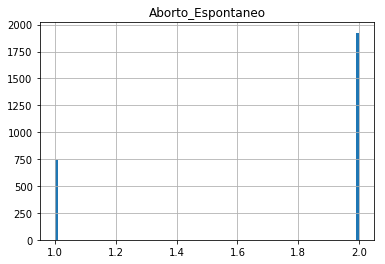

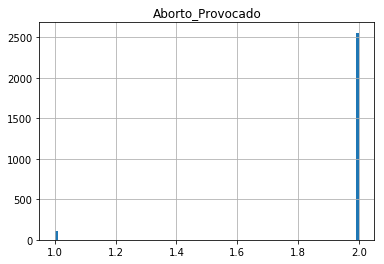

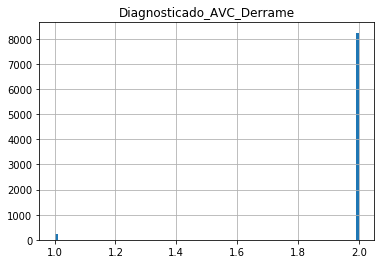

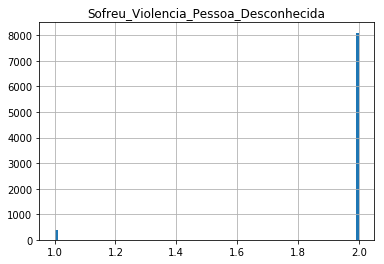

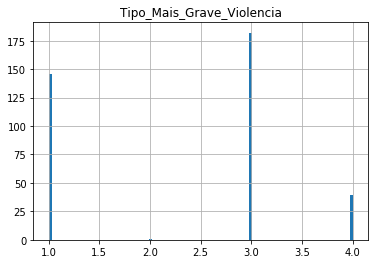

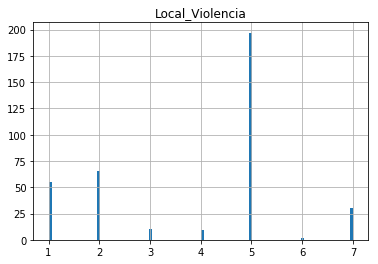

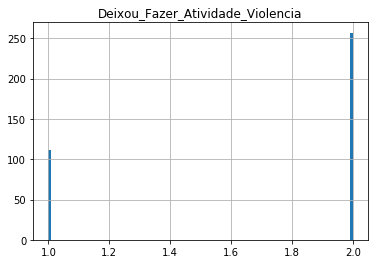

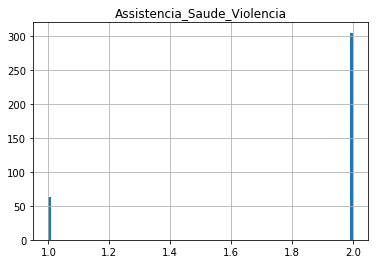

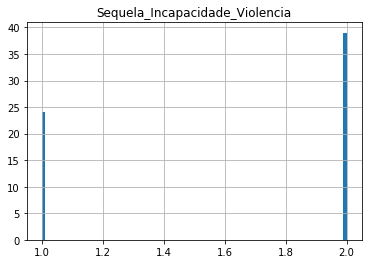

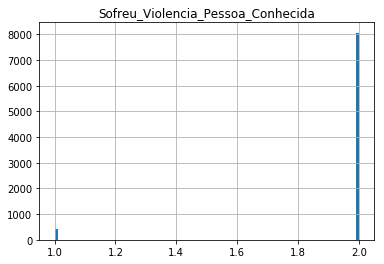

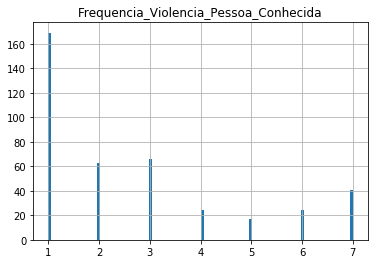

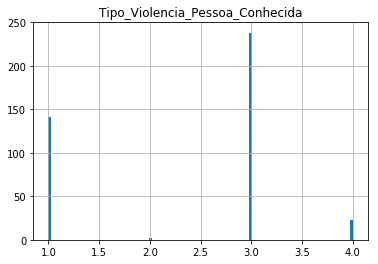

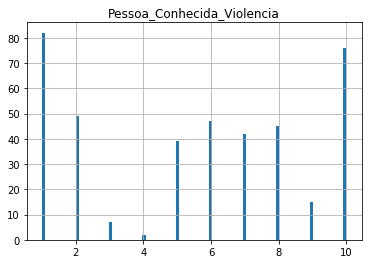

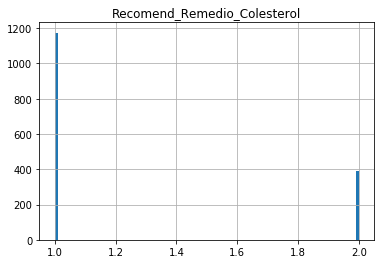

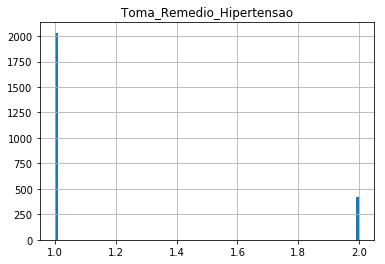

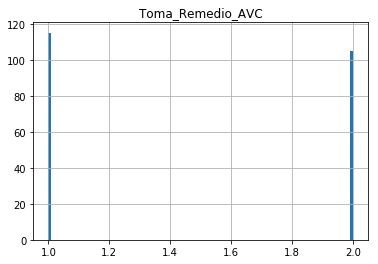

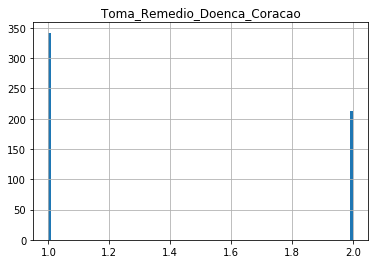

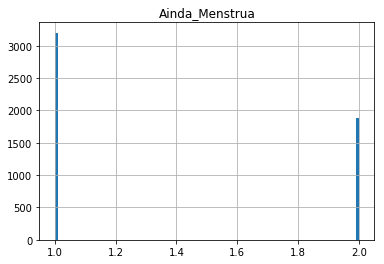

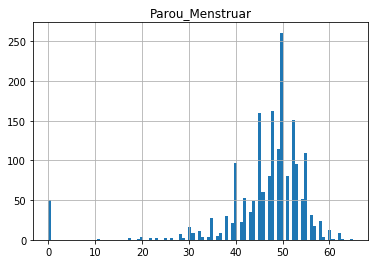

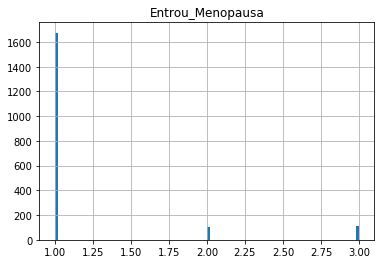

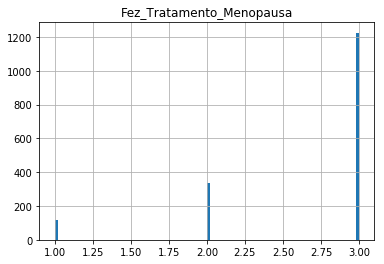

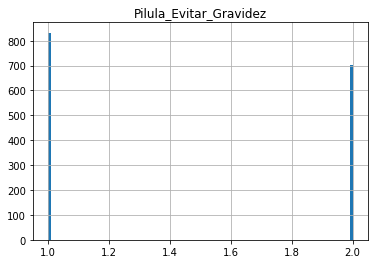

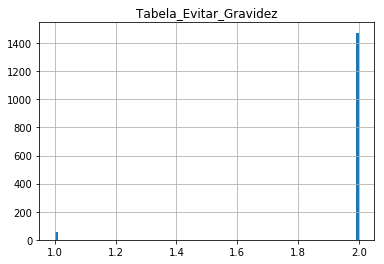

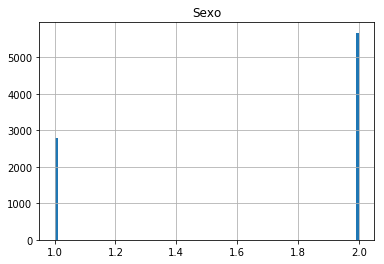

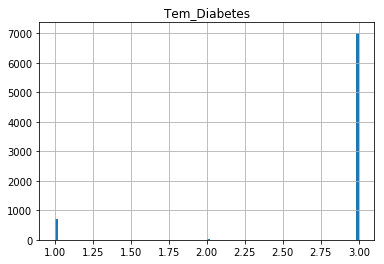

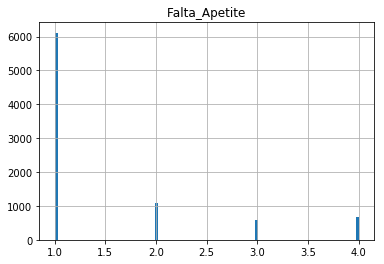

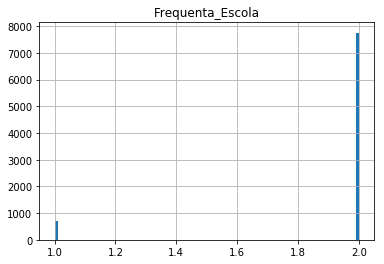

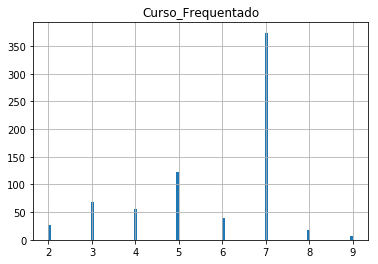

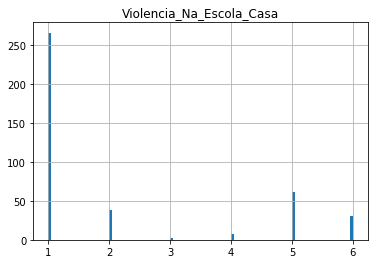

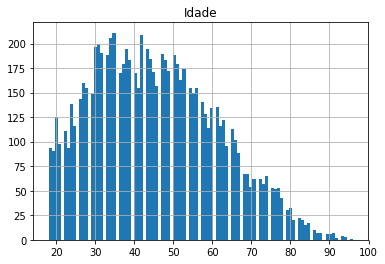

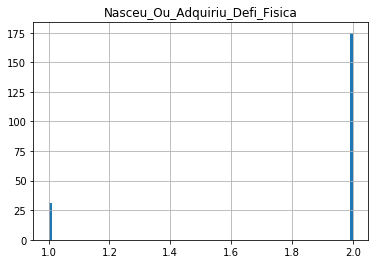

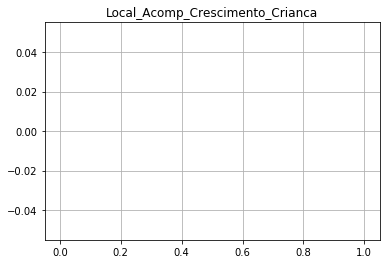

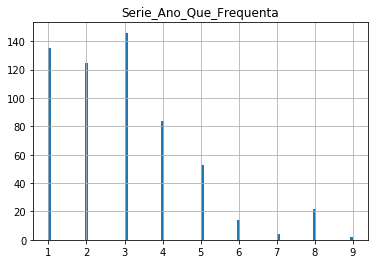

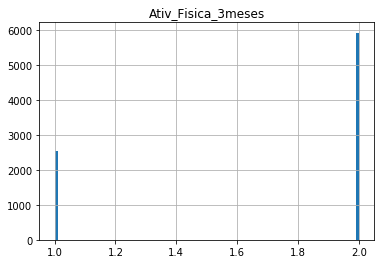

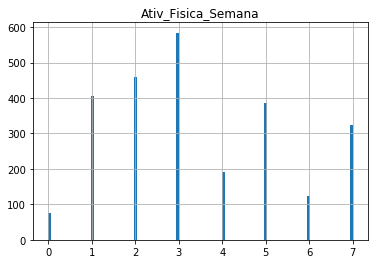

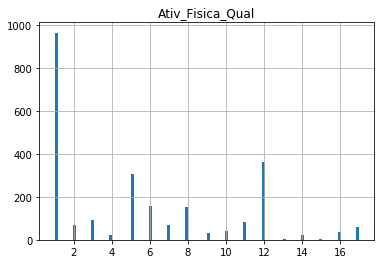

In [17]:
#path = '{}/figures'.format(module_path)

#fig, ax = plt.subplots()

for col in list(df_sample):
    df_sample.hist(column=col, bins=100)
 #   fig.savefig('{}/{}.png'.format(path, col))


# Base com 1000 amostras aleatorias

In [18]:
df_sampleNew = df_sample.sample(1000)

## Intervalo de Confiança
### Idade

In [19]:
z = 2.054 # 96%
s = df_sampleNew['Idade'].std()
m = df_sampleNew['Idade'].mean() 
n = df_sampleNew.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

44.88784133803902 < 45.93 < 46.97215866196098


## Parou de menstruar

In [20]:
z = 2.054 # 96%
s = df_sampleNew['Parou_Menstruar'].std()
m = df_sampleNew['Parou_Menstruar'].mean() 
n = df_sampleNew.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

46.33923561893387 < 46.91121495327103 < 47.483194287608185


### Uso por quantos dias de remédio para dormir

In [21]:
z = 2.054 # 96%
s = df_sampleNew['Uso_Quantos_Dias_Remedio_Dormir'].std()
m = df_sampleNew['Uso_Quantos_Dias_Remedio_Dormir'].mean() 
n = df_sampleNew.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

10.56845709477384 < 10.869955156950672 < 11.171453219127503


### Idade da Gravidez

In [22]:
z = 2.054 # 96%
s = df_sampleNew['Idade_Gravidez'].std()
m = df_sampleNew['Idade_Gravidez'].mean() 
n = df_sampleNew.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

20.766308250172397 < 21.09433962264151 < 21.422370995110622


## Poder Discriminativo de variáveis
### Idade

In [23]:
df_sample1 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Idade'].std()
m1 = df_sample1['Idade'].mean()
n1 = df_sample1['Idade'].count()

df_sample2 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Idade'].std()
m2 = df_sample2['Idade'].mean()
n2 = df_sample2['Idade'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = (m1 - m2)/t
##print("{} , {}, {} ||| {}, {}, {} ||| {}, {}, {} ".format(s1,m1,n1,s2,m2,n2,sa,sb,t))
print("Limiar : {} > {}".format(limiar,0.5))

Limiar : 3.851584815342322 > 0.5


## Parou de menstruar

In [24]:
df_sample1 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Parou_Menstruar'].std()
m1 = df_sample1['Parou_Menstruar'].mean()
n1 = df_sample1['Parou_Menstruar'].count()

df_sample2 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Parou_Menstruar'].std()
m2 = df_sample2['Parou_Menstruar'].mean()
n2 = df_sample2['Parou_Menstruar'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)
##print("{} , {}, {} ||| {}, {}, {} ||| {}, {}, {} ".format(s1,m1,n1,s2,m2,n2,sa,sb,t))
print("Limiar : {} > {}".format(limiar,0.5))

Limiar : 0.11844741134486914 > 0.5


### Uso por quantos dias de remédio para dormir

In [25]:
df_sample1 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Uso_Quantos_Dias_Remedio_Dormir'].std()
m1 = df_sample1['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n1 = df_sample1['Uso_Quantos_Dias_Remedio_Dormir'].count()

df_sample2 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Uso_Quantos_Dias_Remedio_Dormir'].std()
m2 = df_sample2['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n2 = df_sample2['Uso_Quantos_Dias_Remedio_Dormir'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)
##print("{} , {}, {} ||| {}, {}, {} ||| {}, {}, {} ".format(s1,m1,n1,s2,m2,n2,sa,sb,t))
print("Limiar : {} > {}".format(limiar,0.5))

Limiar : 0.07101176256419611 > 0.5


### Idade da Gravidez

In [26]:
df_sample1 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Idade_Gravidez'].std()
m1 = df_sample1['Idade_Gravidez'].mean()
n1 = df_sample1['Idade_Gravidez'].count()

df_sample2 = df_sampleNew.loc[df_sampleNew['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Idade_Gravidez'].std()
m2 = df_sample2['Idade_Gravidez'].mean()
n2 = df_sample2['Idade_Gravidez'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)
##print("{} , {}, {} ||| {}, {}, {} ||| {}, {}, {} ".format(s1,m1,n1,s2,m2,n2,sa,sb,t))
print("Limiar : {} > {}".format(limiar,0.5))

Limiar : 1.9837359511353212 > 0.5


## Outliers

In [27]:
df_numeric = df_sample[['Idade', 'Parou_Menstruar', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez']]
limiar = 3 * df_numeric.std()
mean = df_numeric.mean()
outliers = (df_numeric < mean - limiar) | (df_numeric > mean + limiar)
outliers.describe()

,Idade,Parou_Menstruar,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez
count,8470,8470,8470,8470
unique,2,2,1,2
top,False,False,False,False
freq,8466,8419,8470,8429
